###### ## Observations and Insights 

1.	The correlation coefficient is high at 0.84. This suggests a strong positive relationship between the weight of the mouse and the tumor size, the variables are directly related. Furthermore, the slope of the regression is high at 0.95 confirming that about 84% of the variability in the tumor volume is explained by weight. The remaining 16% is explained by other factors not captured in the linear regression. Thus, as the weight increases, the tumor size also increases. Perhaps a host of measures which lead to a reduction in mice weight should be considered in bringing down the tumor size.


2.	 Visual inspection from the box plot indicate that Capomulin and Ramicane were more effective in reducing the tumor size when compared to Infubol and Ceftamin.









In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#mouse_metadata.head
#study_results.head

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
# Display the data table for preview
combined_df.tail()
#combined_df.shape


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4
1892,z969,Naftisol,Male,9,30,45,73.867845,4


In [2]:
# Checking the number of mice.
combined_df['Mouse ID'].value_counts()

g989    13
k403    10
j365    10
j984    10
k210    10
        ..
v199     1
t573     1
f932     1
b447     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
index_df = combined_df.set_index('Mouse ID')


In [4]:
# Get all the data for the duplicate mouse ID. 
index_df.loc['g989']


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,0,45.000000,0
g989,Propriva,Female,21,26,5,48.786801,0
g989,Propriva,Female,21,26,5,47.570392,0
g989,Propriva,Female,21,26,10,51.745156,0
g989,Propriva,Female,21,26,10,49.880528,0
g989,Propriva,Female,21,26,15,51.325852,1
g989,Propriva,Female,21,26,15,53.442020,0
g989,Propriva,Female,21,26,20,55.326122,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouseclean_df = index_df.drop(['g989'])

In [6]:
# Checking the number of mice in the clean DataFrame.
mouseclean_df.shape

(1880, 7)

In [7]:
#clean_df version 2 included index 'Mouse ID'

mouseclean2_df = mouseclean_df.reset_index()

# number of mice in ccelan_df version 2
mouseclean2_df['Mouse ID'].value_counts()

k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
tumor2 = mouseclean2_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
tumor2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

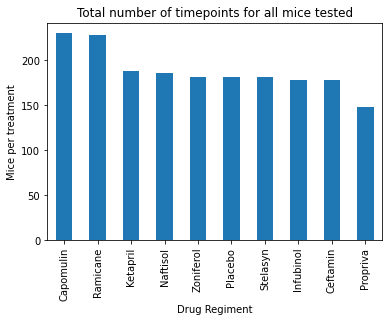

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# timepoint = mouseclean2_df.groupby(['Drug Regimen'])['Timepoint'].count()
bar_plot = mouseclean2_df['Drug Regimen'].value_counts().plot.bar (width=0.5, zorder=4)
#timepoint.sort_values(ascending=False).plot.bar() 


bar_plot.set_xlabel("Drug Regiment")
bar_plot.set_ylabel("Mice per treatment")
bar_plot.set_title("Total number of timepoints for all mice tested")
 
plt.show()
# timepoint

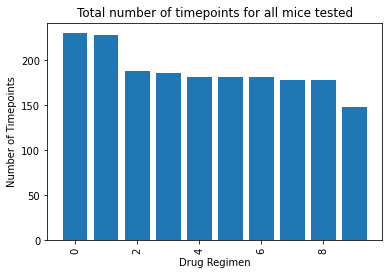

In [10]:
# # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# timepoint_desc = bar_plot.sort_values( ascending=False) # sorting
counts = mouseclean2_df['Drug Regimen'].value_counts()
# plt.bar(timepoint_desc.index, timepoint_desc.values) 
 
x_axis = np.arange(len(counts))
plt.bar(x_axis,counts)

plt.ylabel('Number of Timepoints', size=10) #  y label
plt.xlabel('Drug Regimen') #  x label
plt.title('Total number of timepoints for all mice tested') #  x label
plt.xticks(rotation='vertical') # rotating x values
plt.show()

<AxesSubplot:ylabel='Sex'>

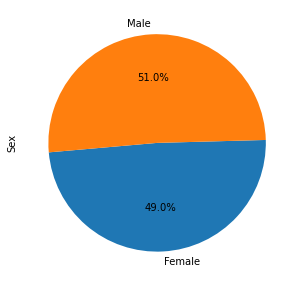

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# mice grouped by sex 
sex = mouseclean2_df.groupby(['Sex'])['Sex'].count()

sex.plot.pie(startangle=185,autopct='%1.1f%%', figsize=(5, 5))


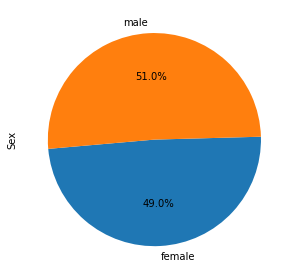

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


plt.pie(sex, labels=('female', 'male'), startangle=185, autopct='%1.1f%%')
plt.ylabel('Sex') # labeled the pie chart
plt.tight_layout() # used to make it look better
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timept = mouseclean2_df.groupby(['Mouse ID'])['Timepoint'].max()
last_timept_df = pd.DataFrame(last_timept) #  Dataframe to enable merging

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
last_df = pd.merge(mouseclean2_df, last_timept_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for  index, row in last_df.iterrows():
        if row["Drug Regimen"] == 'Capomulin':
            tumor_capomulin.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == treatments[1]:
            tumor_ramicane.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == treatments[2]:
            tumor_infubinol.append(row['Tumor Volume (mm3)'])
        if row["Drug Regimen"] == treatments[3]:
            tumor_ceftamin.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": tumor_capomulin,
                       treatments[1]: tumor_ramicane,
                       treatments[2]: tumor_infubinol,
                       treatments[3]: tumor_ceftamin
                       })
    
    # Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()

drug_df
    

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


## Box Plot

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


In [16]:
##Determining outliers for upper and lower bounds
       
#calculating quartiles, quantiles,  
quart_cap = drug_df[treatments[0]].quantile([.25, .5, .75])
low_cap = quart_cap[.25]
med_cap = quart_cap[.5]
up_cap = quart_cap[.75]
iqr_cap = up_cap-low_cap
lowb_cap = low_cap - (1.5*iqr_cap)
upb_cap = up_cap + (1.5*iqr_cap)
max_cap = drug_df[treatments[0]].max()
min_cap = drug_df[treatments[0]].min()

quart_ram = drug_df['Ramicane'].quantile([.25, .5, .75])
low_ram = quart_ram[.25]
med_ram = quart_ram[.5]
up_ram = quart_ram[.75]
iqr_ram = up_ram-low_ram
lowb_ram = low_ram - (1.5*iqr_ram)
upb_ram = up_ram + (1.5*iqr_ram)
max_ram = drug_df[treatments[1]].max()
min_ram = drug_df[treatments[1]].min()

quart_inf = drug_df[treatments[2]].quantile([.25, .5, .75])
low_inf = quart_inf[.25]
med_inf = quart_inf[.5]
up_inf = quart_inf[.75]
iqr_inf = up_inf-low_inf
lowb_inf = low_inf - (1.5*iqr_inf)
upb_inf = up_inf + (1.5*iqr_inf)
max_inf = drug_df[treatments[2]].max()
min_inf = drug_df[treatments[2]].min()

quart_cef = drug_df[treatments[3]].quantile([.25, .5, .75])
low_cef = quart_cef[.25]
med_cef = quart_cef[.5]
up_cef = quart_cef[.75]
iqr_cef = up_cef-low_cef
lowb_cef = low_cef - (1.5*iqr_cef)
upb_cef = up_cef + (1.5*iqr_cef)
max_cef = drug_df[treatments[3]].max()
min_cef = drug_df[treatments[3]].min()

outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[low_cap, low_ram, low_inf, low_cef],
                         'Upper Quartile':[up_cap, up_ram, up_inf, up_cef],
                         'IQR':[iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                         'Median':[med_cap, med_ram, med_inf, med_cef],
                        'Upper Bound': [upb_cap, upb_ram, upb_inf, upb_cef],
                        'Lower Bound': [lowb_cap, lowb_ram, lowb_inf, lowb_cef],
                        'Max': [max_cap, max_ram, max_inf, max_cef],
                         'Min': [min_cap, min_ram, min_inf, min_cef]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,51.832015,20.704562,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,87.666458,25.355450,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,82.741446,36.832905,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,54.306811,17.912664,45.220869,22.050126


In [17]:
cap_m = drug_df['Capomulin'] > 47.69
drug_df["Capomulin"]

0     38.982878
1     38.939633
2     30.485985
3     37.074024
4     40.159220
5     47.685963
6     37.311846
7     38.125164
8     38.753265
9     41.483008
10    38.846876
11    28.430964
12    33.329098
13    46.539206
14    32.377357
15    41.581521
16    23.343598
17    40.728578
18    34.455298
19    31.023923
20    40.658124
21    39.952347
22    36.041047
23    28.484033
24    31.896238
Name: Capomulin, dtype: float64

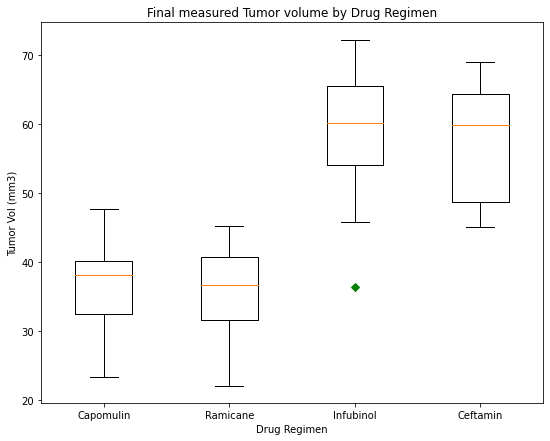

In [18]:
 
# Boxplot list of drug tumor data. 
boxplot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen') #set title
ax.set_xlabel('Drug Regimen') # set x label
ax.set_ylabel('Tumor Vol (mm3)') #set y lable
# used ax.boxplot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(boxplot_list, 0, 'gD')
plt.xticks([1,2,3,4], treatments) # set labels of each boxplot
plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

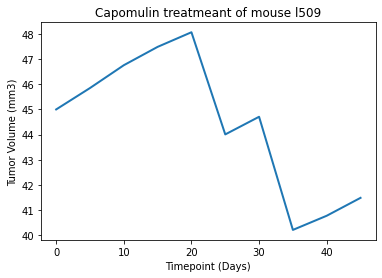

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

line_df = mouseclean2_df.loc[mouseclean2_df["Mouse ID"] == "l509",:]
line_df
# determine the x axis list 
x_axisTP = line_df["Timepoint"] 
# determine the y axis or tumor size list 
tumsiz = line_df["Tumor Volume (mm3)"] 

plt.title('Capomulin treatmeant of mouse l509') 

plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12) 
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()


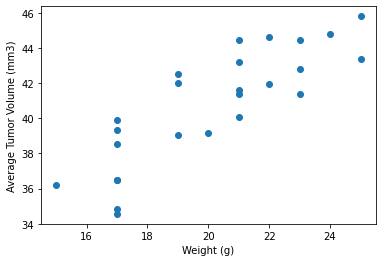

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capom_df = mouseclean_df.loc[mouseclean_df["Drug Regimen"] == "Capomulin",:]
#  groupby() and mean() in coming up with a data frame
tumorvol = capom_df.groupby(['Mouse ID']).mean()

plt.scatter(tumorvol['Weight (g)'],tumorvol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()
tumorvol


## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(tumorvol['Weight (g)'],tumorvol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")


The correlation between mouse weight and average tumor volume is 0.84


In [22]:
# cdetermining the linear regression values 
regre_values=st.linregress(tumorvol['Weight (g)'],tumorvol['Tumor Volume (mm3)'])
regre_values

LinregressResult(slope=0.9544396890241048, intercept=21.552160532685008, rvalue=0.8419363424694721, pvalue=1.3225722434712404e-07, stderr=0.12754359033201323, intercept_stderr=2.5909876867683455)

In [23]:
# defined slope  and the intercept of the linear regression
slope = 0.9544396890241045
intercept = 21.552160532685015

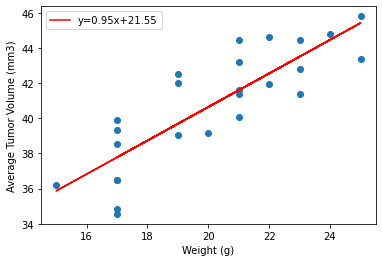

In [24]:
# regression line on the scatter plot

regre_line = slope*(tumorvol['Weight (g)'])+intercept

plt.scatter(tumorvol['Weight (g)'],tumorvol['Tumor Volume (mm3)'])

#  .format() function for labeling the regression line 
plt.plot(tumorvol['Weight (g)'], regre_line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.savefig('linearregression')
plt.show()